**Processamento Digital de Imagens - 2022/01**<br/>
**Engenharia da Computação**<br/>
**Aluno:** Gabriel Soares Baptista, 2018102117<br/>

### Questão 7

In [167]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from PIL import Image

### Resolução

Primeiro lemos a imagem que iremos segmentar.

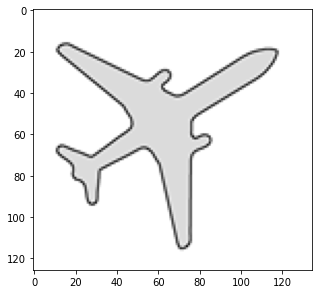

In [195]:
image = Image.open('../images/11.43.bmp').convert('L')
image = np.array(image, dtype='uint8')

plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.show()

Para facilitar o procedimento, podemos binarizar a imagem para que seja mais simples efetuar os cálculos, entretanto, no final utilizamos os valores obtidos para fazer a alteração na imagem original, não nos trazendo uma perda tão grande devido a qualidade não satisfatória da imagem binarizada.

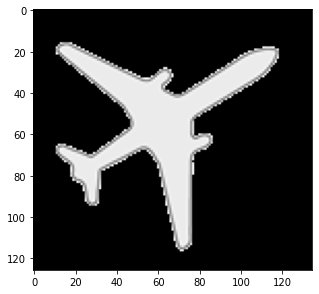

In [196]:
binarized_image = image.copy()
binarized_image[binarized_image == 255] = 0

plt.figure(figsize=(5, 5))
plt.imshow(binarized_image, cmap='gray')
plt.show()

Para começarmos os cálculos, devemos encontrar a matriz de valores não nulos. Portanto, iremos percorrer a imagem binarizada salvando as posições dos pixels com valor de intensidade diferentes de zero.

In [225]:
N, M = image.shape
non_zero_pixels = []

for i in range(N):
    for j in range(M):
        if binarized_image[i, j] != 0:
            non_zero_pixels.append([j, i])

non_zero_pixels = np.array(non_zero_pixels)

Com a matriz acima, podemos calcular o vetor médio dos valores, além de utilizarmos a equação (11.4-5) do livro texto para calcular a matriz de covariância, isto é, a seguinte equação:

$$
C_x = \frac{1}{K} \sum_{k=1}^{K}x_k x_k^T - m_x m_x^T
$$

In [244]:
mean = np.mean(non_zero_pixels, axis=0)
K = non_zero_pixels.shape[0]
cov = (1/(K - 1)) * np.dot((non_zero_pixels - mean).T, (non_zero_pixels - mean))

Como queremos encontrar os o ângulo de rotação da imagem, isto é, utilizar a decomposição de elementos principais para encontrar a direção que captura a maior variância dos dados, neste caso, consequentemente encontroaríamos a direção de inclinação do avião, uma vez que representa a direção do autovetor que melhor descreve a variância do conjunto de amostras (pixels).

Portanto, obtemos os autovetores e autovalores da matriz. Obtemos o conjunto `eigen_pairs` de forma que estão ordenados em ordem decrescente em relação aos autovalores.

In [238]:
eigen_values, eigen_vectors = np.linalg.eig(cov)
eigen_pairs = [(eigen_values[i], eigen_vectors[i]) for i in range(len(eigen_values))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

Separamos os valores ordenados novamente em autovalores e autovetores, entretanto, note que os índices são associados, isto é, o autovalor no índice zero corresponde ao autovetor também no índice zero.

In [239]:
sorted_eigen_values = np.array([pair[0] for pair in eigen_pairs])
sorted_eigen_vectors = np.array([pair[1] for pair in eigen_pairs])

Portanto, através da trigonometria básica podemos obter o ângulo de inclinação do autovetor associado ao maior autovalor, uma vez que corresponderá a direção que captura a maior variância dos dados (direção do corpo do avião, uma vez que contém quase todos pixels da imagem).

In [240]:
angle = np.rad2deg(np.arctan(sorted_eigen_vectors[0][1]/sorted_eigen_vectors[0][0]))

Enfim, utiliza-se o negativo do ângulo descoberto para rotacionar a imagem original.

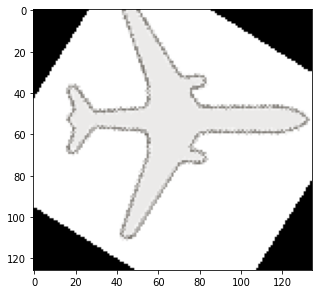

In [246]:
image = skimage.io.imread('../images/11.43.bmp')
rotated_image = np.array(Image.fromarray(image).rotate(-angle))
plt.figure(figsize=(5, 5))
plt.imshow(rotated_image, cmap='gray')
plt.show()